# Xgboost

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,SLP,H,W,V,VM,PM 2.5
0,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [3]:
# Splitting into independent and dependent

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
y.isnull().sum()

2

In [5]:
## Replacing the null values with median
y.fillna(y.median(),inplace=True)

In [6]:
### Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Implementation

In [7]:
import xgboost as xgb

In [8]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [9]:
print('co-efficient r^2 on train: {}'.format(regressor.score(X_train,y_train)))
print('co-efficient r^2 on test: {}'.format(regressor.score(X_test,y_test)))

co-efficient r^2 on train: 0.9987360052279449
co-efficient r^2 on test: 0.5720235247614003


In [10]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(regressor,X,y,cv=5)
score.mean()

0.3764800771038265

In [11]:
### Evaluation

prediction=regressor.predict(X_test)


C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

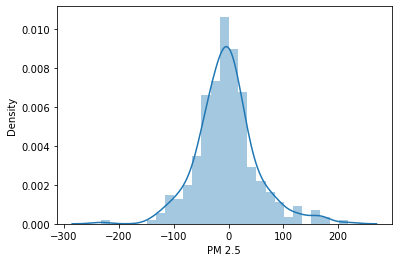

In [12]:
sns.distplot(y_test-prediction)

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM 2.5'>

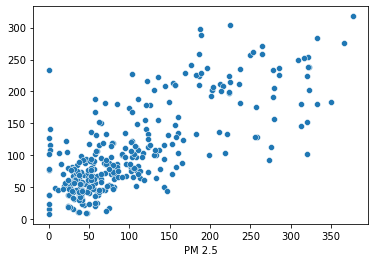

In [13]:
sns.scatterplot(y_test,prediction)

In [14]:
from sklearn.metrics import r2_score
print('r2 score: {}'.format(r2_score(y_test,prediction)))

r2 score: 0.5720235247614003


In [15]:
### Hyperparameter tuning

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
learning_rate=['0.05','0.1','0.2','0.3','0.5','0.6']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]

In [18]:
random_grid={
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'subsample': subsample,
    'min_child_weight': min_child_weight
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV

regresser=xgb.XGBRegressor()
xg_random=RandomizedSearchCV(regresser,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=5, verbose=2, random_state=42, n_jobs=1)

In [20]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.5s
[CV] END learning_ra

[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.8s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.7s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.6s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsa

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   2.7s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsampl

[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   4.0s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   4.0s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   3.9s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   4.0s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   3.2s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   3.2s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   2.3s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   3.1s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, sub

[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsampl

[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.9s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.6s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.6; total time=   1.7s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          predictor=None, random_state=None,
                             

In [21]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [22]:
xg_random.best_score_

-3104.73052875857

In [23]:
prediction=xg_random.predict(X_test)

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM 2.5'>

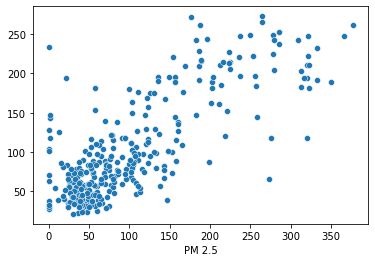

In [24]:
# scatter

sns.scatterplot(y_test,prediction)

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

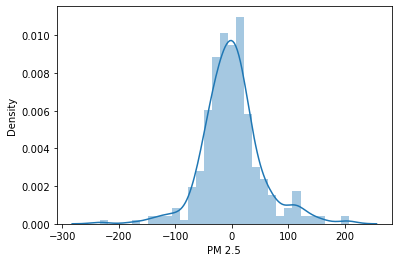

In [25]:
sns.distplot(y_test-prediction)

In [28]:
### Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [31]:
print('MAE: {}'.format(mean_absolute_error(y_test,prediction)))
print('MSE: {}'.format(mean_squared_error(y_test,prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,prediction))))
print('R^2: {}'.format(r2_score(y_test,prediction)))

MAE: 36.667788736730294
MSE: 2742.2545480536432
RMSE: 52.36654034833353
R^2: 0.617076965468433
